#### A single neuron

A neuron can take in more than one number of inputs and gives out an output. A single neuron in neural network is composed of a linear and a non-linear unit. A linear function is defined as,

\begin{equation*}
z(x_1, x_2, x_3,..., x_n) = \sum_{k=1}^n w_i\cdot x_i + b= w_1\cdot x_1 + w_2\cdot x_2 + w_3\cdot x_3 + ... + w_n\cdot x_n + b
\end{equation*}

Non-linear can be any non-linear function like sigmoid, tanh, relu, sin or cos \[But  not a good idea to use sin or cos\] . This function is called activation function. The output of activation function is the output of the neuron. Let's m be activation function. Then a neuron is defined by below funciton.

\begin{equation*}
m(z((x_1, x_2, x_3,..., x_n)))
\end{equation*}




In [1]:
import numpy as np

# %matplotlib inline
%matplotlib nbagg
from matplotlib import pyplot as plt

class IdentityActivation:
    def __init(self):
        self.prev_x = None

    def forward(self, x):
        self.prev_x = x
        return x
    
    def backward(self, upstream_grad):
        return 1 * upstream_grad

class SELoss():
    """
    Squared error loss. Used for one sample.
    """
    def __init__(self):
        self.y = None
        self.y_pred = None

    def forward(self, y, y_pred):
        self.y = y
        self.y_pred = y_pred
        loss = np.square(self.y - self.y_pred) / 2
        return loss

    def backward(self):
        local_grad = -1 * (self.y - self.y_pred)
        return local_grad

class MSELoss():
    """
    Squared error loss.
    """
    def __init__(self, num_samples):
        self.y = None
        self.y_pred = None
        self.num_samples = num_samples

    def forward(self, y, y_pred):
        self.y = y
        self.y_pred = y_pred
        loss = np.sum(np.square(self.y - self.y_pred)) / (2 * self.num_samples)
        return loss

    def backward(self):
        local_grad = (-1 / self.num_samples) * (self.y - self.y_pred)
        return local_grad

In [2]:
se = SELoss()
assert se.forward(0, 0.5), 0.125
assert se.backward(), 0.5

In [3]:
mse = MSELoss(num_samples = 4)
y_pred = np.array([0.5, 0.646, 0.525, 0.668])
y = np.array([0, 1, 1, 1])
assert np.round(mse.forward(y, y_pred), 3), 0.089
assert np.all(np.round(mse.backward(), 3) == np.array([ 0.125, -0.088, -0.119, -0.083]))

In [4]:
class Neuron():
    """
    Trainable parameters of a neuron is it's weight and bias.
    The weights are intialized randomly. There are many methods
    for initializing weights of a neuron. The bias of a neuron is
    initialized to 0. Randomly initializing bias is not proven to
    be advantage for training (yet).The number of weights for a 
    neuron depends on the number of inputs and the neuron will
    have a bias.

    Here the weights are initialised from a Gaussian distribution
    with 0 mean and 0.1 spread(standard deviation).
    """
    def __init__(self, num_inputs, sz_batch, activation):
        self.num_inputs = num_inputs
        self.sz_batch = sz_batch
        self.input_shape = (self.num_inputs, self.sz_batch)
        self.activation = activation()
        np.random.seed(seed=44)
        self.params = {
            "w" : np.random.normal(loc=0, scale=0.1, size=self.num_inputs).reshape(1, self.num_inputs),
            # "w" : np.array([[0.1, 0.6]]),
            "b" : np.zeros([1,1], dtype=np.float64)
        }
        self.gradient = {
            "dw" : None,
            "da" : None,
            "db" : 1
        }
        
    def forward(self, a):
        self.prev_a = a
        assert self.input_shape == self.prev_a.shape
        self.z = np.dot(self.params["w"], self.prev_a) + self.params["b"]
        self.a = self.activation.forward(self.z)
        return self.a
    
    def backward(self, upstream_gradient):
        upstream_gradient = self.activation.backward(upstream_gradient)
        self.gradient = {
            "dw" : np.dot(upstream_gradient, self.prev_a.T),
            "da" : np.dot(self.params["w"].T, upstream_gradient),
            "db" : np.sum(upstream_gradient, axis=1, keepdims=True)
        }
        return self.gradient["da"]
    
    def update(self, lr):
        self.params["w"] = self.params["w"] - (lr / self.sz_batch) * self.gradient["dw"]
        self.params["b"] = self.params["b"] - (lr / self.sz_batch) * self.gradient["db"]
        

In [5]:
def get_data(num_samples, m, b):
    x = np.linspace(start=0, stop=1, num=num_samples)
    # x = np.arange(num_samples) # exploding gradients
    y = m * x + b
    return x, y

In [6]:
num_samples = 100
x, y = get_data(num_samples= num_samples, m = 2, b = 1)
# plt.plot(x, y, linestyle='--', marker='o', color='b')

In [7]:
from sklearn.utils import shuffle
from celluloid import Camera
import matplotlib

<IPython.core.display.Javascript object>


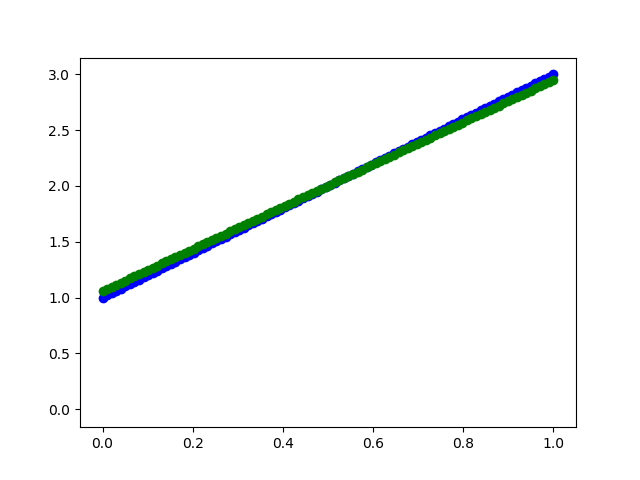

Epoch: 1, Loss: 2.2033552846771594, weight: [[-0.05129978]], Bias: [[0.0404871]]
Epoch: 101, Loss: 0.22075089864023806, weight: [[0.64409922]], Bias: [[1.15197811]]
Epoch: 201, Loss: 0.060117006556965086, weight: [[0.88902233]], Bias: [[1.43499569]]
Epoch: 301, Loss: 0.042213678511840574, weight: [[1.00490716]], Bias: [[1.48852746]]
Epoch: 401, Loss: 0.0361074183773113, weight: [[1.08169074]], Bias: [[1.47965477]]
Epoch: 501, Loss: 0.0315117594299936, weight: [[1.14467725]], Bias: [[1.454908]]
Epoch: 601, Loss: 0.027550993671401416, weight: [[1.20111688]], Bias: [[1.427175]]
Epoch: 701, Loss: 0.024091964288144446, weight: [[1.25320826]], Bias: [[1.39995944]]
Epoch: 801, Loss: 0.021067520315776283, weight: [[1.30172861]], Bias: [[1.37415167]]
Epoch: 901, Loss: 0.018422781040361668, weight: [[1.34704782]], Bias: [[1.34991825]]
Epoch: 1001, Loss: 0.016110054484558437, weight: [[1.38941213]], Bias: [[1.32722903]]
Epoch: 1101, Loss: 0.014087659055160729, weight: [[1.429024]], Bias: [[1.3060

In [10]:
# %matplotlib nbagg
neuron = Neuron(num_inputs=1, sz_batch=100, activation=IdentityActivation)
mse = MSELoss(num_samples)
losses = []
x_train = x.reshape(1, -1)
fig = plt.figure()
camera = Camera(fig)
for i in range(5001):
    # y_train = y
    x_train, y_train = shuffle(x, y, random_state=0)
    x_train = x_train.reshape(1, -1)
    y_pred = neuron.forward(x_train)
    loss = mse.forward(y_train, y_pred)
    upstream_gradient = mse.backward()
    _ = neuron.backward(upstream_gradient)
    neuron.update(lr = 1)
    if i % 100 == 1:
        plt.plot(x, y, linestyle='--', marker='o', color='b')
        plt.plot(x, neuron.params["w"].squeeze() * x + neuron.params["b"].squeeze(), linestyle='--', marker='o', color='g')
        camera.snap()
        plt.show()
        print("Epoch: {}, Loss: {}, weight: {}, Bias: {}".format(i, loss, neuron.params["w"], neuron.params["b"]))
animation = camera.animate()
animation.save('learning line.gif', writer="pillow", dpi=16)
# plt.show()

* [Nothing but NumPy](https://medium.com/towards-artificial-intelligence/nothing-but-numpy-understanding-creating-neural-networks-with-computational-graphs-from-scratch-6299901091b0)